# Census Income Project

## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Loading the Dataset

In [2]:
#Import the dataset

df_census = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df_census

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

The dataset comprises of numerical data columns and categorical data columns. Since the problem statement says that we are suppose to predict the "Income" column which has 2 class namely "<=50K" and ">50K" so it makes this to be a Classification problem.

## Shape of data with number of rows and columns


In [3]:
df_census.shape

(32560, 15)

There are 32560 rows and 15 columns in dataset

In [4]:
#checking column names
df_census.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
#checking the datatype information
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As we can see in the above cell, there are 6 columns with integer datatype and 9 columns that have object datatype.

## Statistical Analysis

In [6]:
df_census.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

- We can see all the columns are having count 32560 which indicates it doesn't contain any missing values.
- Mean is greater than median in Capital_gain and capital_loss which indicates that data is right skewed.
- Standard Deviation is higher Fnlwgt and capital_gain which indicates data is heavily spreaded.
- Large difference between 75th percentile and max is present in Fnlwgt, capital_gain and capital_loss which indicates outliers may be there.

## Datatypes of all columns

In [7]:
df_census.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Age, Fnlwgt, Education_num, Capital_gain, Capital_loss and Hours_per_week columns are having integer datatype and rest of the columns are having object datatype.

## Checking for null values

In [8]:
#check for is there any null values present in the dataset 

df_census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

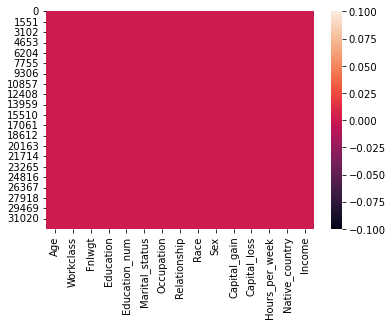

In [9]:
#To check missing values using heatmap
sns.heatmap(df_census.isnull())

There are no missing values in the dataset.

In [10]:
#checking unique values
df_census.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

 In the above cell, we can see all the unique data present in each column of our dataset.

# EDA (Exploratory Data Analysis)

In [11]:
{column:len(df_census[column].unique()) for column in df_census.select_dtypes('object').columns}

{'Workclass': 9,
 'Education': 16,
 'Marital_status': 7,
 'Occupation': 15,
 'Relationship': 6,
 'Race': 5,
 'Sex': 2,
 'Native_country': 42,
 'Income': 2}

In the above cell,we can see every object column and the number of unique values they have. If only one column was having all the unique values then we might have to drop that column but that is not the case here. The column that contains the maximun unique is 'Native_country'.

In [12]:
#selecting the object columns
df_census.select_dtypes('object')

Workclass    Education       Marital_status  \
0       Self-emp-not-inc    Bachelors   Married-civ-spouse   
1                Private      HS-grad             Divorced   
2                Private         11th   Married-civ-spouse   
3                Private    Bachelors   Married-civ-spouse   
4                Private      Masters   Married-civ-spouse   
...                  ...          ...                  ...   
32555            Private   Assoc-acdm   Married-civ-spouse   
32556            Private      HS-grad   Married-civ-spouse   
32557            Private      HS-grad              Widowed   
32558            Private      HS-grad        Never-married   
32559       Self-emp-inc      HS-grad   Married-civ-spouse   

               Occupation    Relationship    Race      Sex  Native_country  \
0         Exec-managerial         Husband   White     Male   United-States   
1       Handlers-cleaners   Not-in-family   White     Male   United-States   
2       Handlers-cleaners         Husband   Black     Male   United-States   
3          Prof-specialty            Wife   Black   Female            Cuba   
4         Exec-managerial            Wife   White   Female   United-States   
...                   ...             ...     ...      ...             ...   
32555        Tech-support            Wife   White   Female   United-States   
32556   Machine-op-inspct         Husband   White     Male   United-States   
32557        Adm-clerical       Unmarried   White   Female   United-States   
32558        Adm-clerical       Own-child   White     Male   United-States   
32559     Exec-managerial            Wife   White   Female   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 9 columns]

## Uni Variate Analysis

Uni variate analysis works with only one variable, hence it is called as uni variate.

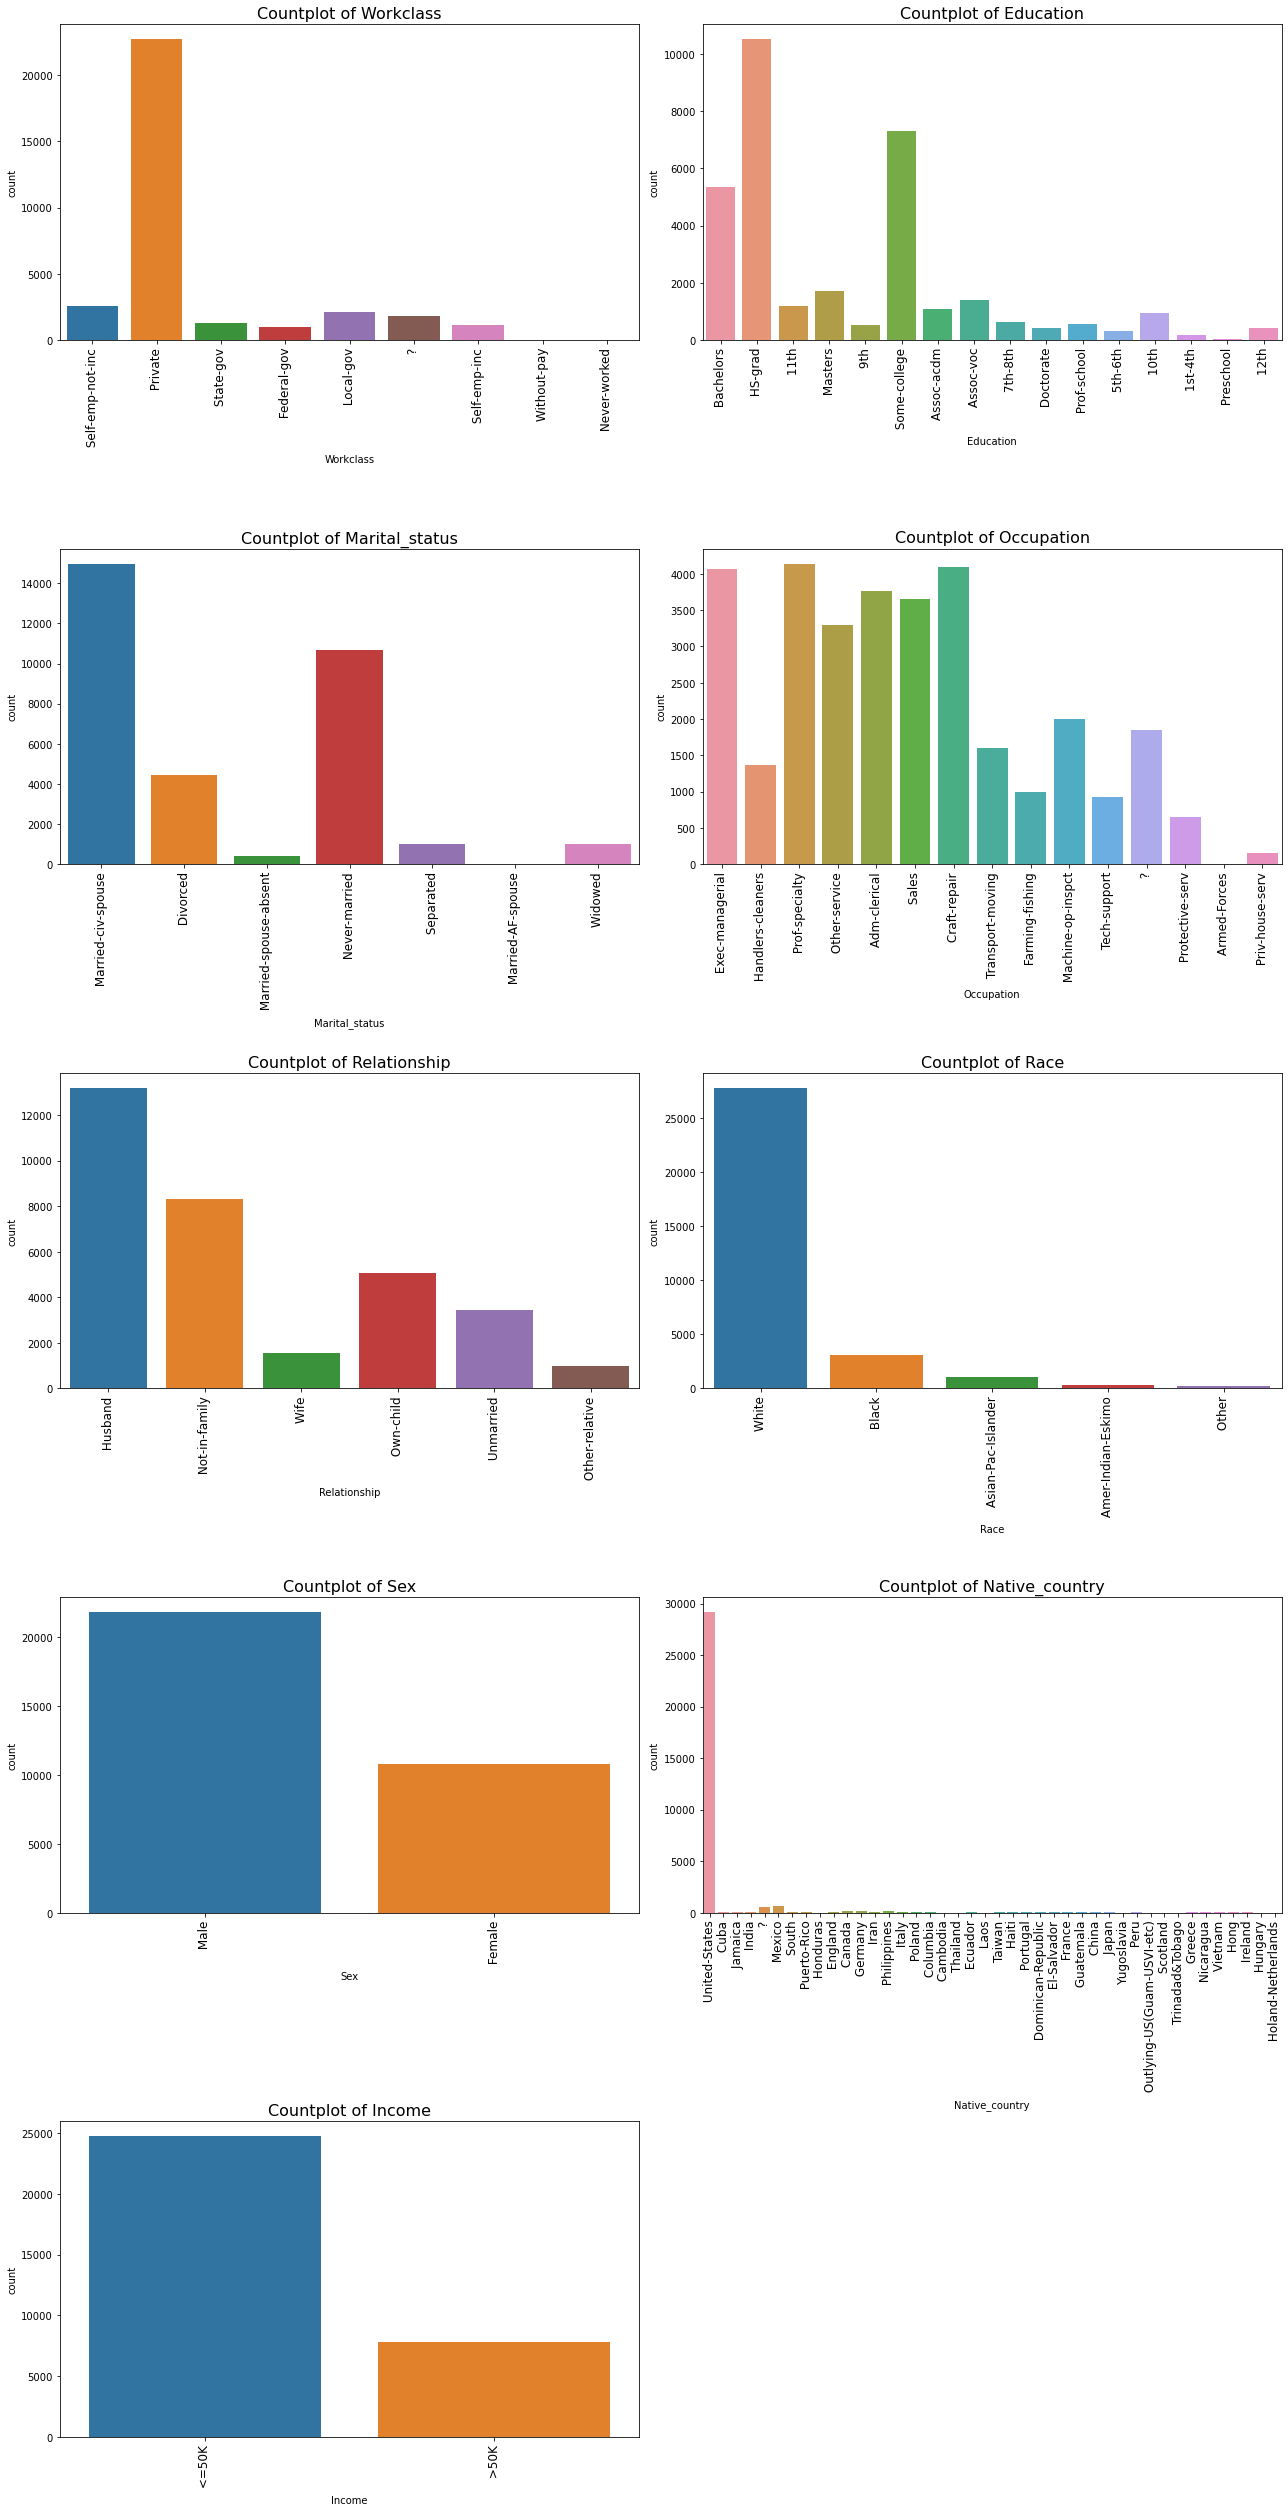

In [13]:
col=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

#checking the countplots of all the object columns
plt.figure(figsize=(18,35))
for i in range(len(col)):
    plt.subplot(5,2,i+1)
    sns.countplot(df_census[col[i]])
    plt.title(f"Countplot of {col[i]}",fontsize=16)
    plt.xticks(rotation=90,fontsize=12)
    plt.tight_layout()

- In case of workclass, the highest number of people work for private sector.
- In case of Education column, HS-grad has the highest count followed by some-college and Bachelors respectively.
- In case of Marital_status, we see that the Marital Status column has married spouse and never married people on the higher edge as compared to the other values.
- In case of Occupation, we can see that it has various categories out of which people in Armed Forces are the least and people engaged in craft-repair, executive managers and holding some professional speciality are on the higher side.
- In case of Relationship, the values for husband is the highest and other relative has the lowest value.
- In case of Race, it consists mostly of white people.
- In case of sex, count of male is higher than female.
- In case of Native country, we can see that most of the people are from US.
- In case od Income, we can see that there are more people having income less than 50k.

In [14]:
#selecting the numerical columns
df_census.select_dtypes(exclude='object')

Age  Fnlwgt  Education_num  Capital_gain  Capital_loss  Hours_per_week
0       50   83311             13             0             0              13
1       38  215646              9             0             0              40
2       53  234721              7             0             0              40
3       28  338409             13             0             0              40
4       37  284582             14             0             0              40
...    ...     ...            ...           ...           ...             ...
32555   27  257302             12             0             0              38
32556   40  154374              9             0             0              40
32557   58  151910              9             0             0              40
32558   22  201490              9             0             0              20
32559   52  287927              9         15024             0              40

[32560 rows x 6 columns]

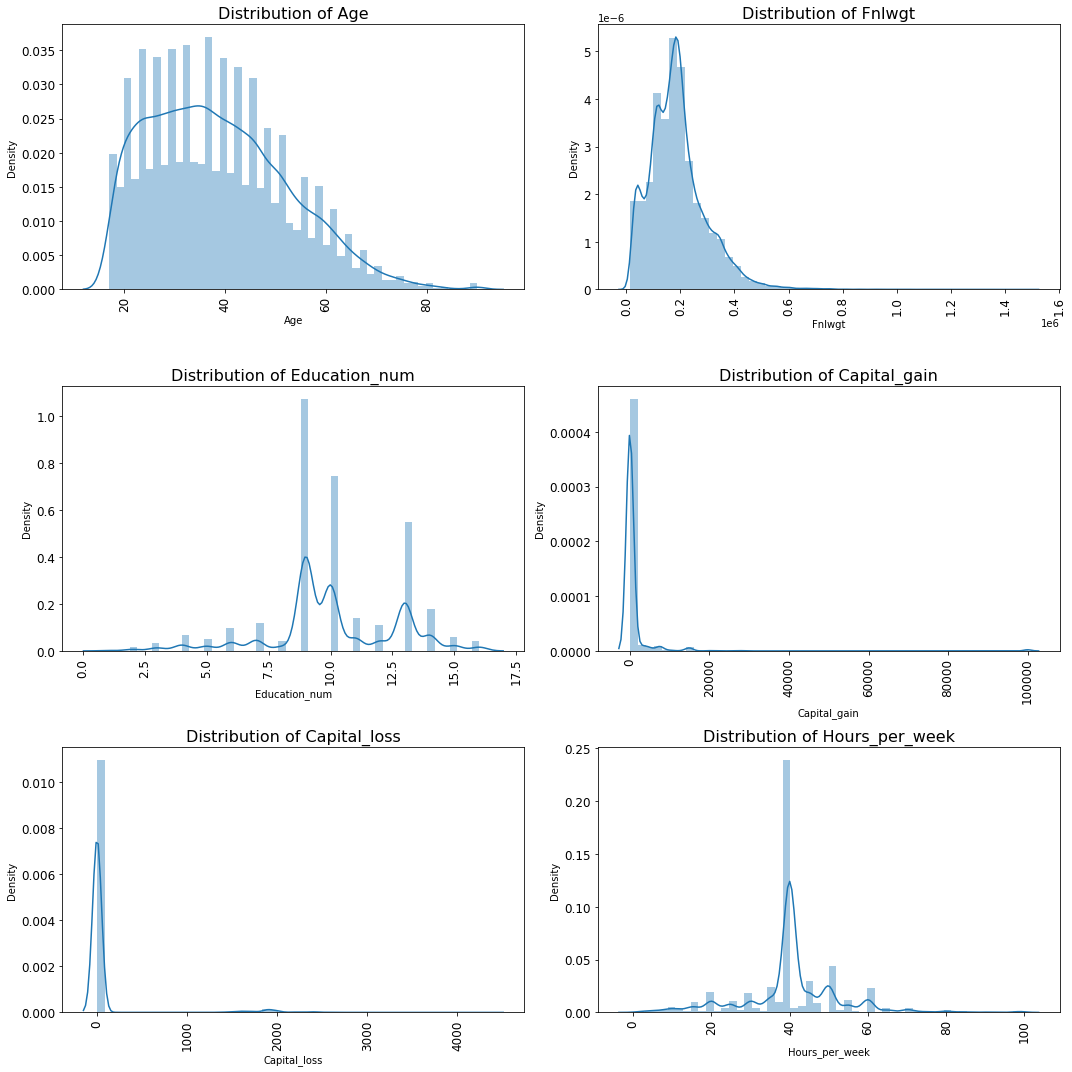

In [15]:
col1=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

#checking distplot for the numerical columns
plt.figure(figsize=(15,15))
for i in range(len(col1)):
    plt.subplot(3,2,i+1)
    sns.distplot(df_census[col1[i]])
    plt.title(f"Distribution of {col1[i]}",fontsize=16)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

- From the distribution plot of Fnlwgt column, we can see that the values are continuous so the distribution is right skewed.
- The remaining distribution plot shows discrete values.

### Bivariate Analysis

Bivariate Analysis works with two variables.

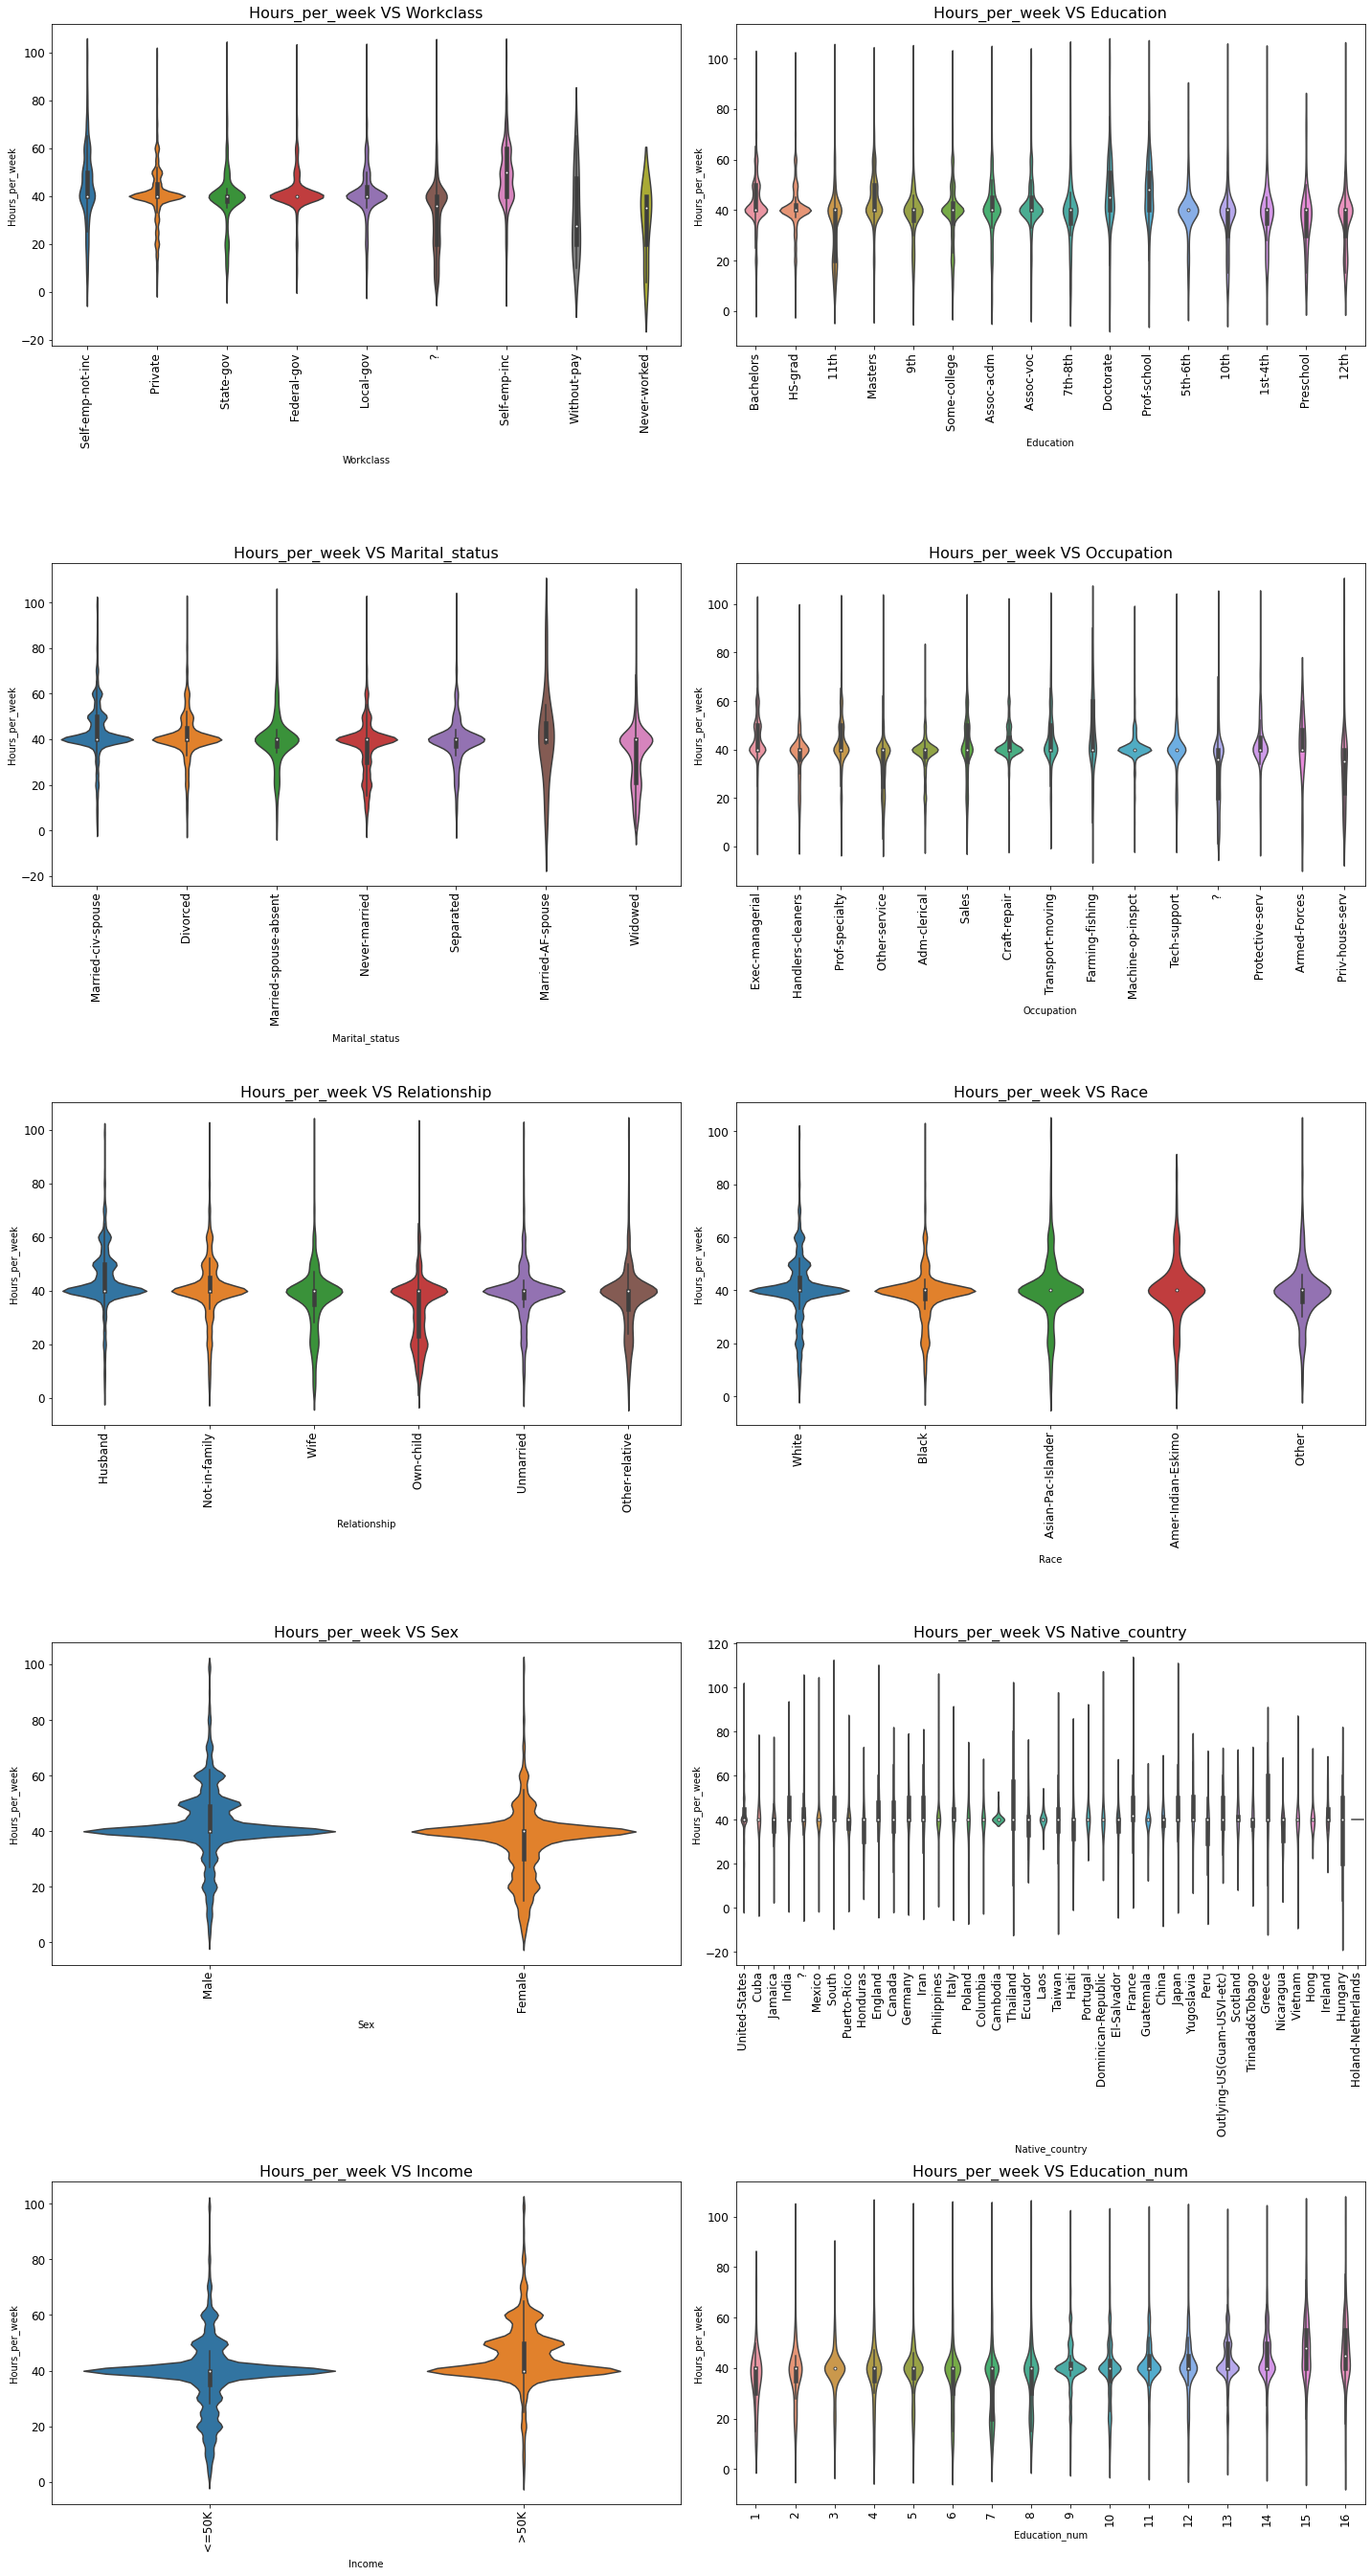

In [16]:
#Checking the relationship of Hour_per_week column with other object features using violinplot
col2=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country',
      'Income','Education_num']

plt.figure(figsize=(20,60))
for i in range(len(col2)):
    plt.subplot(8,2,i+1)
    sns.violinplot(y=df_census['Hours_per_week'],x=df_census[col2[i]])
    plt.title(f"Hours_per_week VS {col2[i]}",fontsize=16)
    plt.xticks(rotation=90,fontsize=12)  
    plt.yticks(fontsize=12)
    plt.tight_layout()

- We see that Govt. Employees do not work more than 80 hours a week and that too in rare cases.
- We can see that people with less education work higher number of hours per week.
- It can be seen that Armed forces person doesnot work more than 60 hours a week while farmers and transport movers works more hours as compared to the other occupations.
- More no. of individuals who have relationship like 'own-child' have high density of working only 20 hours a week.
- It is seen that female works lesser no.of hours as compared to male.
- From relationship, it can be see that people who are husband, works more as compared to others.
- From Race, we can say that white people work more as compared to others.
- From education, it can be seen that people who are prof. or are doing doctorate works higher no.of hours per week.

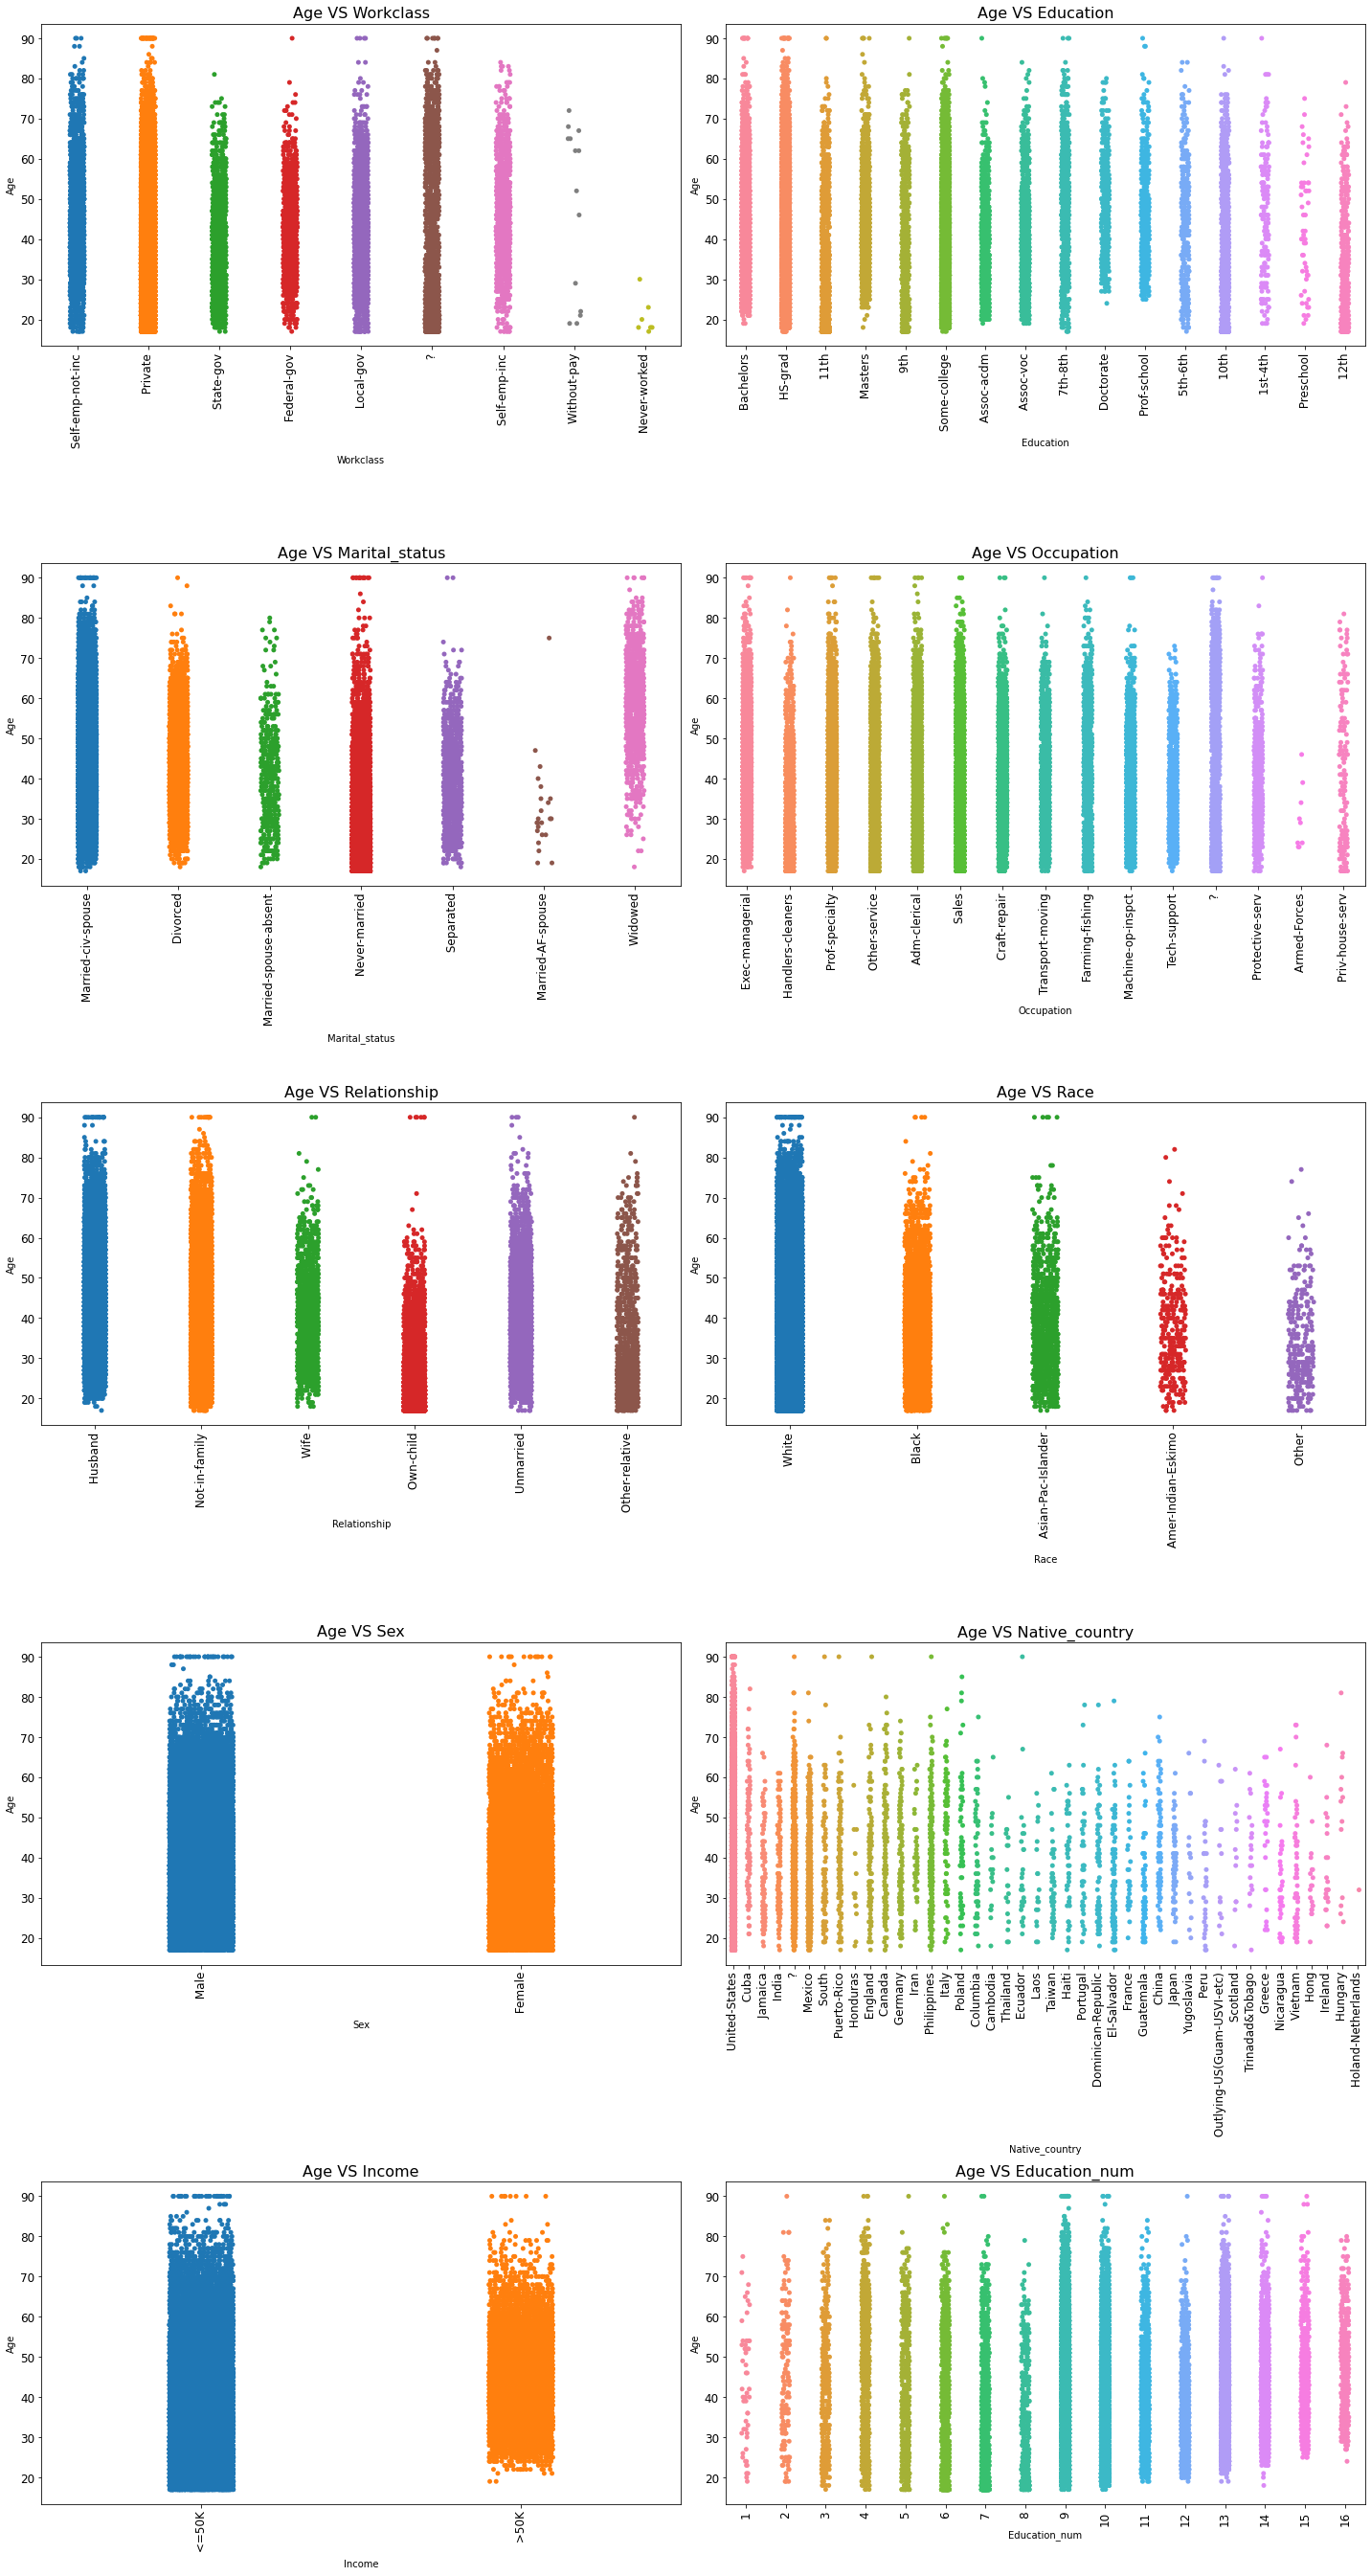

In [17]:
#checking the relationship of Age with other feature columns 
plt.figure(figsize=(20,60))
for i in range(len(col2)):
    plt.subplot(8,2,i+1)
    sns.stripplot(y=df_census['Age'],x=df_census[col2[i]])
    plt.title(f"Age VS {col2[i]}",fontsize=16)
    plt.xticks(rotation=90,fontsize=12)  
    plt.yticks(fontsize=12)
    plt.tight_layout()

- Individuals working in the govt. sector have almost age 70 to 80 with few outliers which must be the retirement age for them.
- It is also seen that there are no individual who do not work after age of 30.
- We can see that there are no individuals of age >70 belonging to the pre-school education category while doctorates and professors appears from late 20's as they have to study for more years to get to that level of education.
- In the case of education_num, with increase in age education number increases.
- There are no people after the age of 50 in the marital_status category from the Armed forces with just a few outliers.
- With the increase in age, the number of widows increases.
- Working men has higher age than working female.
- People from US are higher who are working and falls into the age group from 15 to 85.
- People from age group between 15 to 85 have income more or equal to 50k.

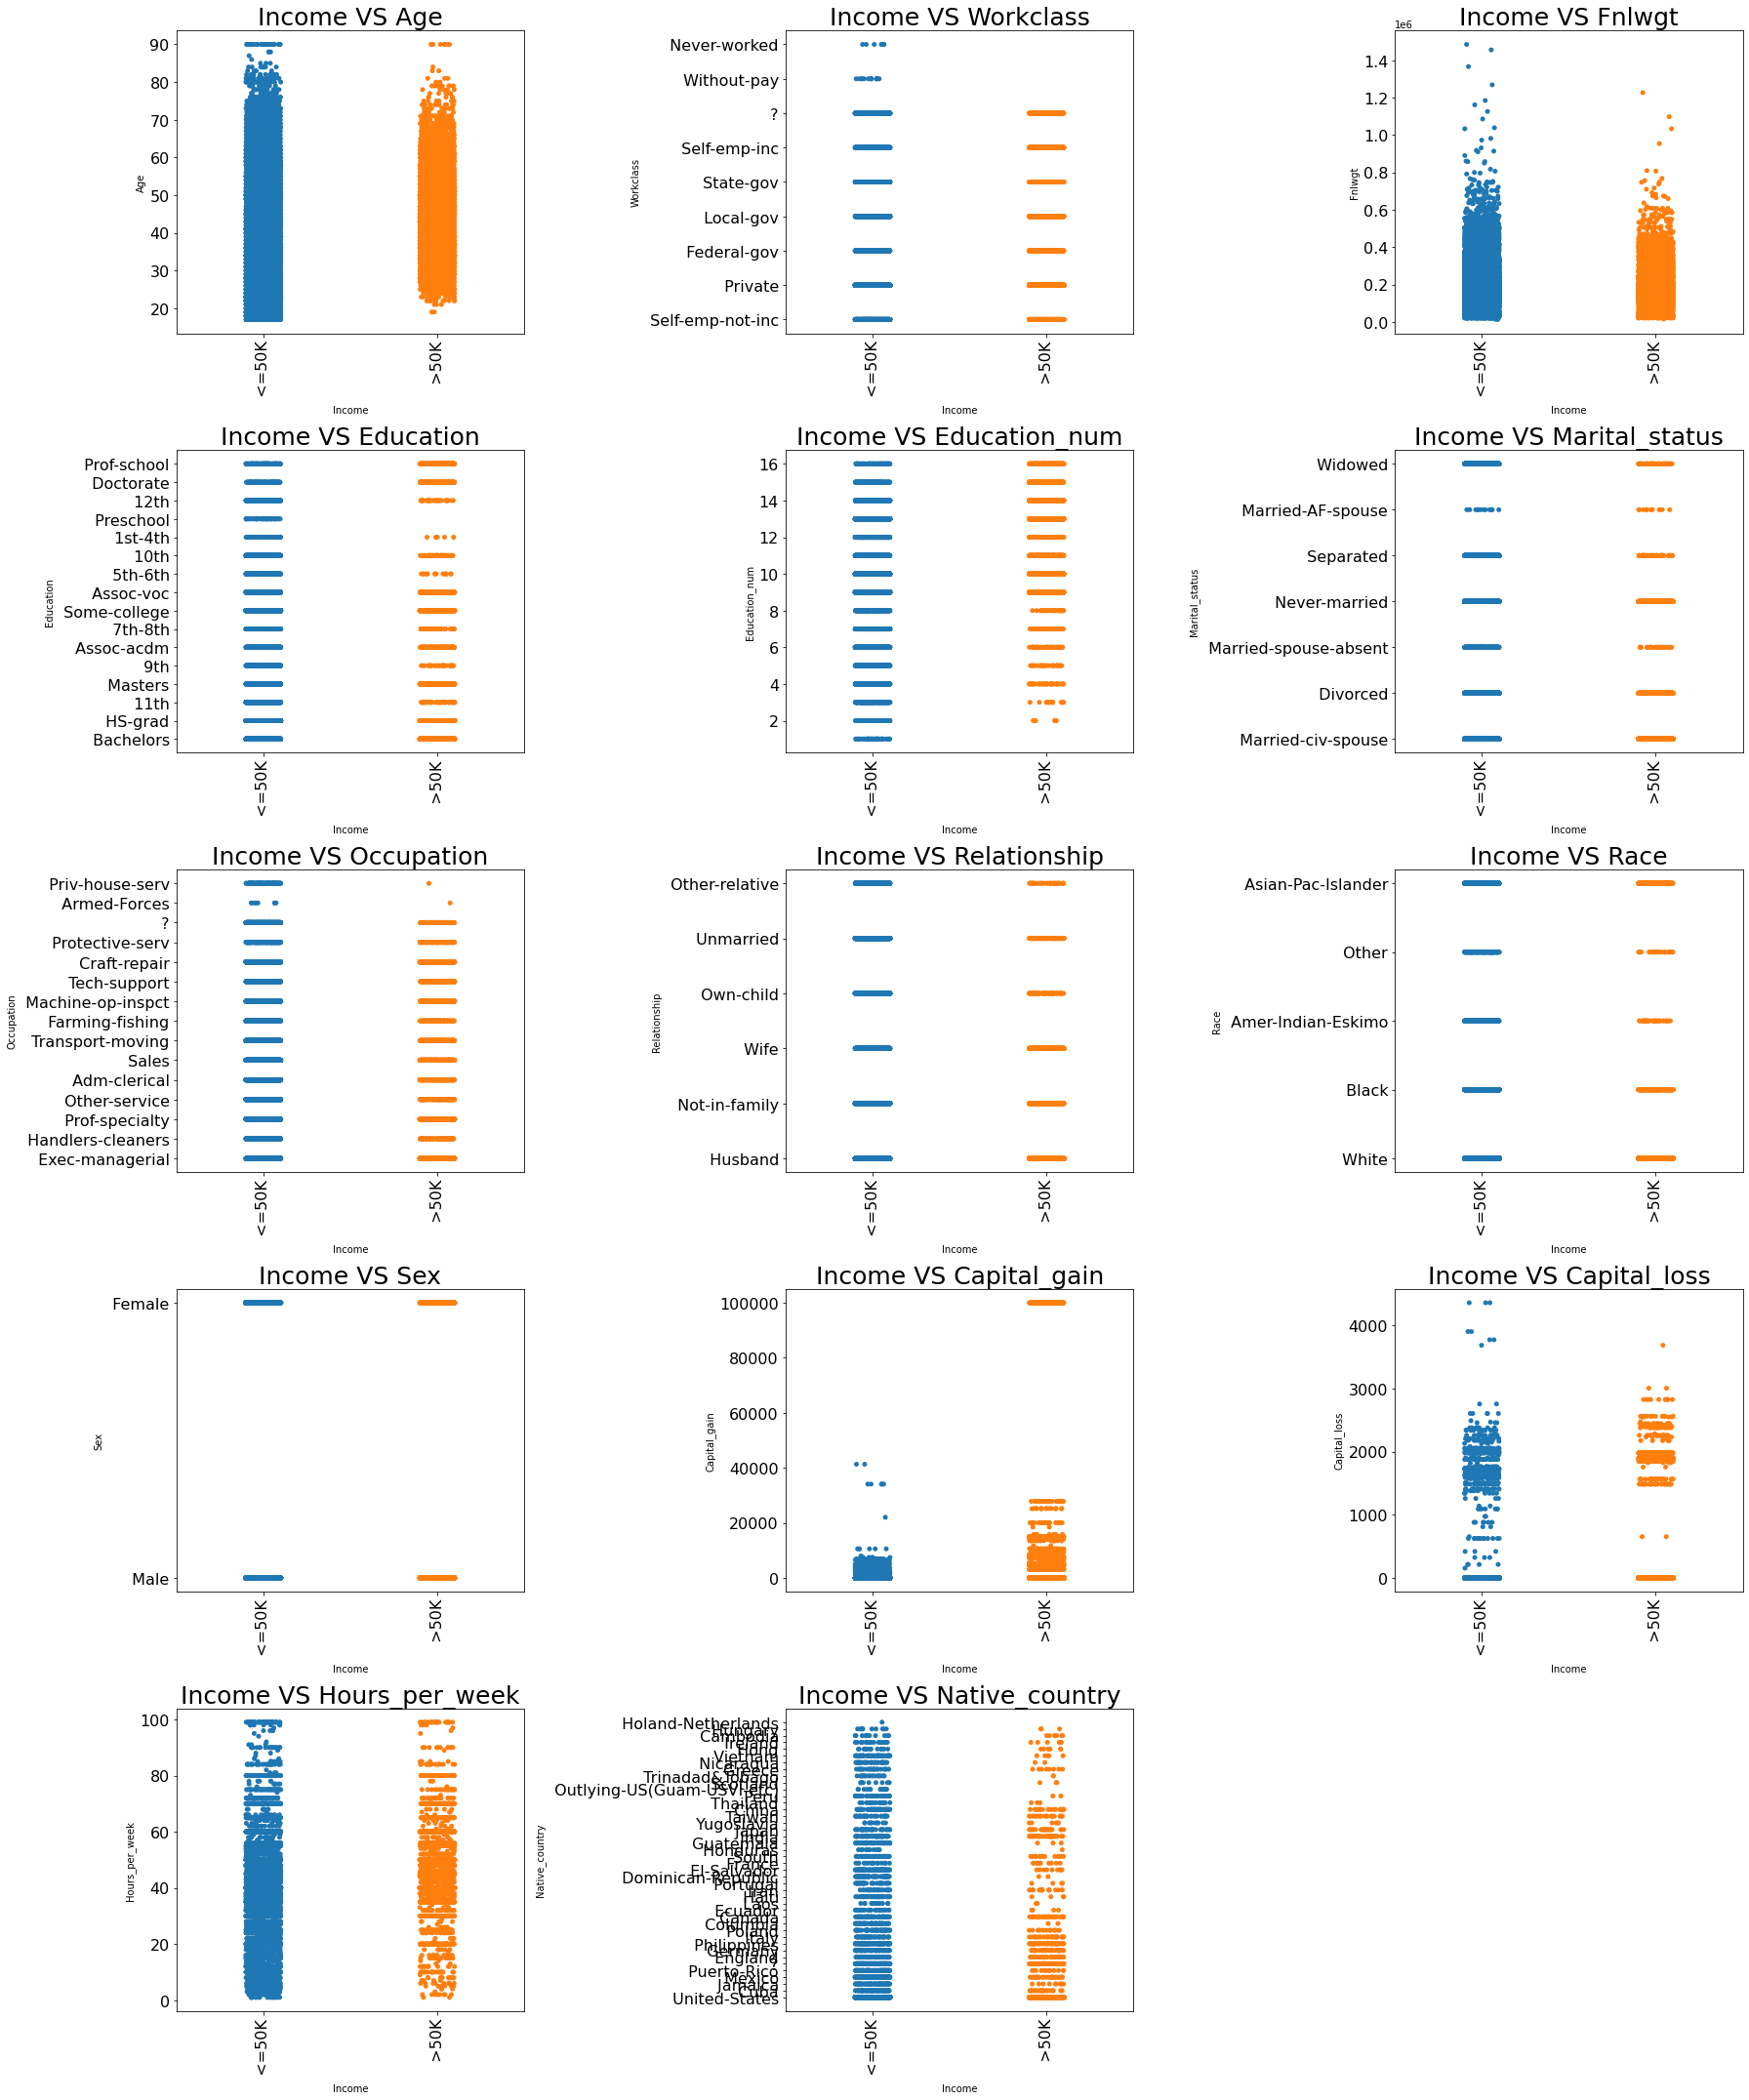

In [18]:
#Checking the relationship of our Target label Income with the feature columns using stripplot

col3=['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']

plt.figure(figsize=(25,30))
for i in range(len(col3)):
    plt.subplot(5,3,i+1)
    sns.stripplot(x=df_census['Income'],y=df_census[col3[i]])
    plt.title(f"Income VS {col3[i]}",fontsize=25)
    plt.xticks(rotation=90,fontsize=16)  
    plt.yticks(fontsize=16)
    plt.tight_layout()

- From age, we can say that people from age 25-65 have high chances to earn more than 50k.
- From workclass, we see that except for without pay and never worked, other workclass have chances to earn more than 50k.
- From education it can be see that as the education increase, there are more chances to earn more than 50k. Same is the case with education_num.
- From marital status, we see that except for married AF spouse, all have chances to earn more than 50k.
- From occupation, we see that as the number of occupation increase, there are more chances to earn more than 50k
- From relationship and sex, we can see that there is no such effect of relationship or sex on income.
- From capital_gain, we see that higher the capital income is, higher is the chance to earn more than 50k
- From capital_loss, we see that lesser the capital_loss more is the income.

Lets plot the last two plots separately to understand it clearly.

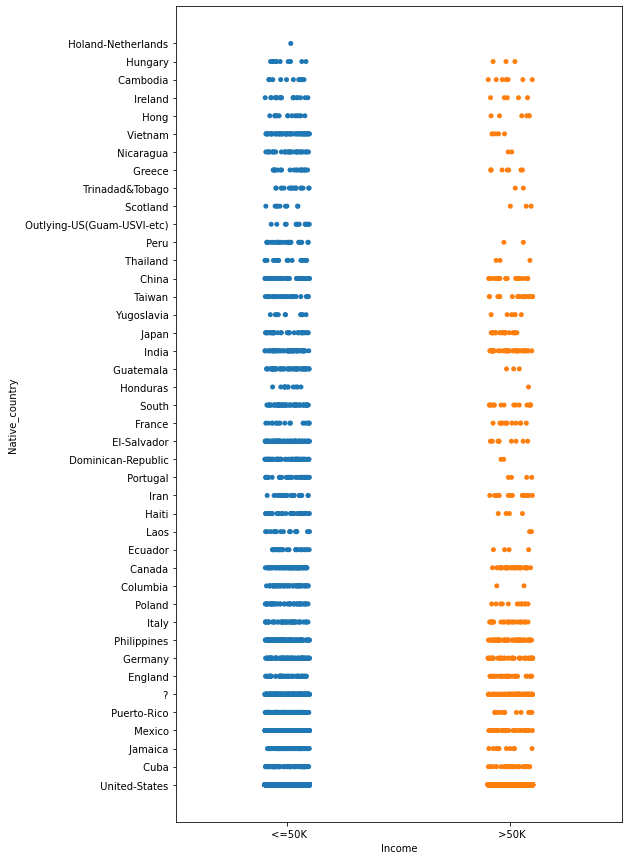

In [19]:
plt.figure(figsize=(8,15))
sns.stripplot(x = 'Income', y = 'Native_country', data=df_census)
plt.show()

 The above plot shows that people belonging to different countries is less which are earning >50k because no.of individuals belonging from other countries other than U.S are very low but it can be see that that there are more people in the category <50k than >50k.

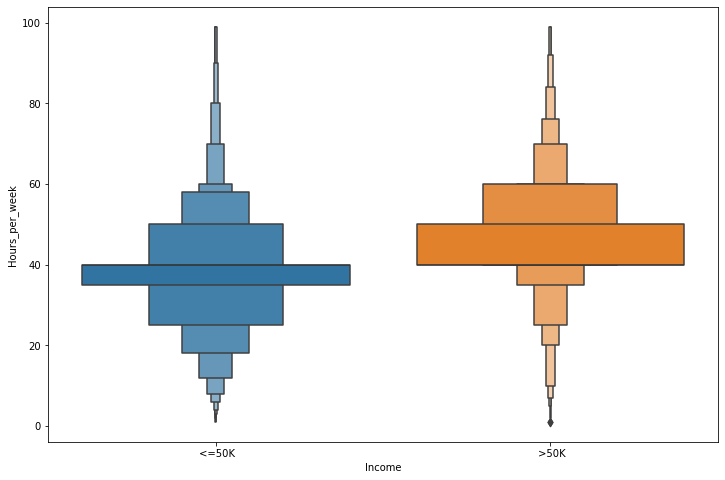

In [20]:
plt.figure(figsize=(12,8))
sns.boxenplot(x = 'Income', y = 'Hours_per_week', data=df_census)
plt.show()

People earning >50k income work more hours per week than those earning <50k.

Text(0.5, 1.0, 'Income Vs Age')

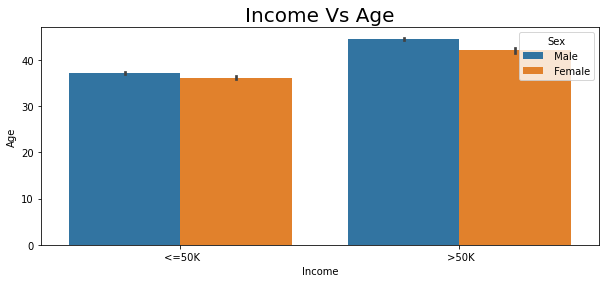

In [21]:
#Checking Income Vs age with barplot
plt.figure(figsize=(10,4))
sns.barplot(x='Income',y='Age',data=df_census,hue='Sex')
plt.title("Income Vs Age",fontsize=20)

The above plot shows as the age increases people are getting paid more but male are having higher income than their female counterparts.

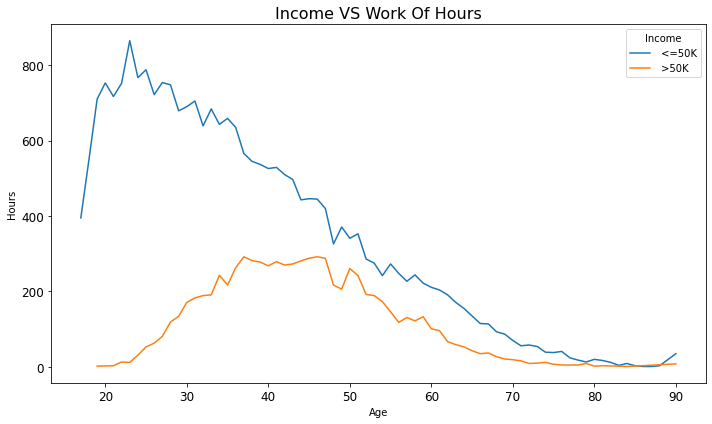

In [22]:
#Checking Income vs work per hour using lineplot
df1_census=df_census.groupby(['Age',"Income"]).apply(lambda x:x['Hours_per_week'].count()).reset_index(name='Hours')

plt.figure(figsize=(10,6))
sns.lineplot(x='Age',y='Hours',data=df1_census,hue='Income')
plt.title("Income VS Work Of Hours",fontsize=16)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()

The above plot shows that People who get salary <50k have to work more hours and people who get salary >50k have to work less hours.

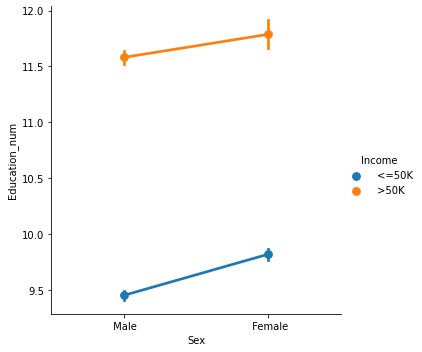

In [23]:
sns.factorplot(x='Sex',y='Education_num',data=df_census,hue='Income')

It can be see that Female with higher education level earn equal as men having less education level than them irrespective of any income category they fall.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

<Figure size 864x576 with 0 Axes>

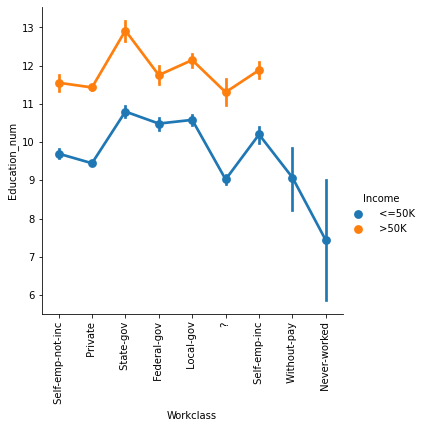

In [24]:
plt.figure(figsize=(12,8))
sns.factorplot(x='Workclass',y='Education_num',hue='Income',data=df_census)
plt.xticks(rotation=90)

 It shows that some people belonging to a particular workclass might have less education and some workclass might require more education level but if they have higher education level they earn more. It can be also seenthat there is no person from without pay and never worked workclass category who earn more than 50k which is logical.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

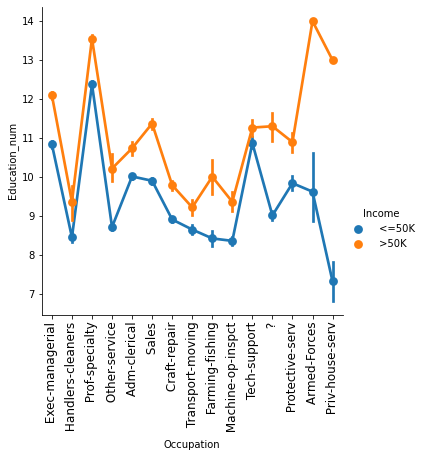

In [25]:
sns.factorplot(x='Occupation',y='Education_num',hue="Income",data=df_census)
plt.xticks(rotation=90,fontsize=12)

From the above plot we can see that People with highest education level belong to armed forces,but people with even education level quite low, who belong to handlers cleaners,transport moving occupation earn as much as they do. Same is the case with prof speciality. occupation of private house service who earn >50k and <50k have the highest education level as same as prof speciality having a very tiny difference.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

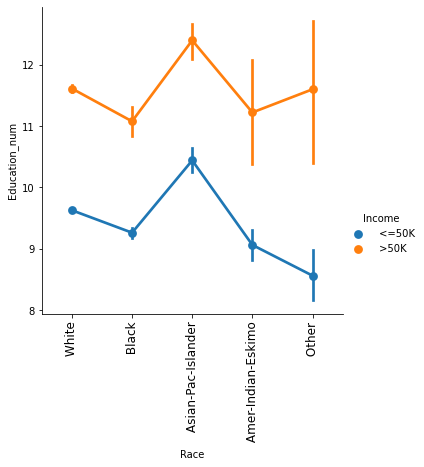

In [26]:
sns.factorplot(x='Race',y='Education_num',hue='Income',data=df_census)
plt.xticks(rotation=90,fontsize=12)

We can see from the above plot that Asian pacific race have comparatively higher education than the fellows who earn same as much as they do,belonging to other races. Indians and some other races earns >50k with lowest education level.

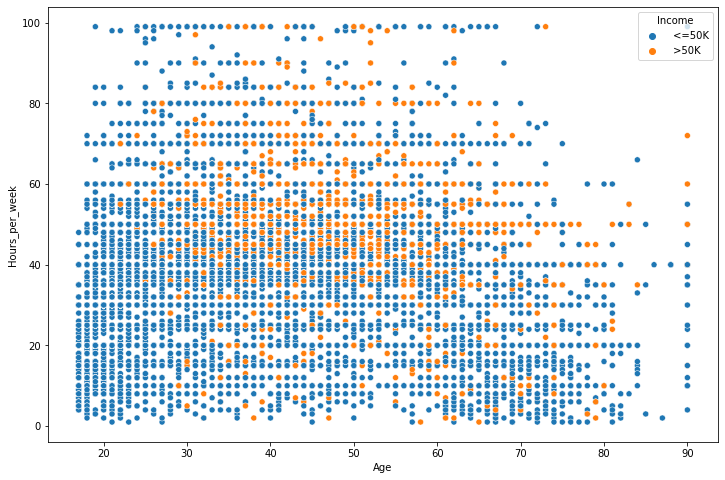

In [27]:
#Checking the realtionship of age and  hours_per_ week with income using scatterplot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age',y='Hours_per_week',data=df_census,hue='Income')
plt.show()

From the plot above, we can see that between age, Hours_per_week and income, a person need to be >30 years of age to earn more than 50k, or else needs to work at least 50 hours per week to earn >50k.

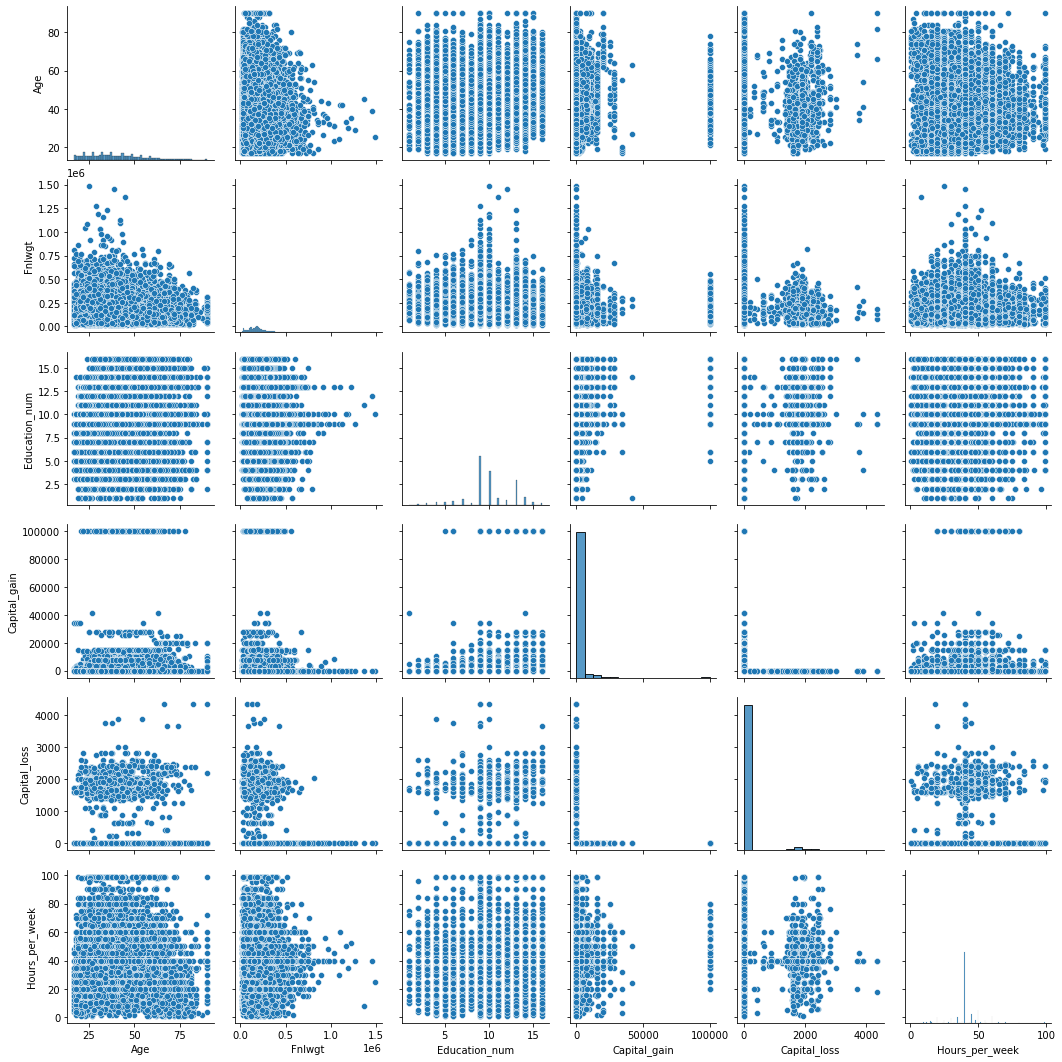

In [28]:
#checking the pairplot of the feature columns
sns.pairplot(df_census)

We generated the above pairplot for our continous data columns and it shows how the data points are available in each of them.

## Encoding

In [29]:
df_census['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [30]:
df_census['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [31]:
df_census['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [32]:
df_census['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [33]:
df_census['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [34]:
df_census['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [35]:
df_census['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [36]:
df_census['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [37]:
df_census['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [38]:
#using labelencoder to transform the 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_census['Workclass']=le.fit_transform(df_census['Workclass'])
df_census['Education']=le.fit_transform(df_census['Education'])
df_census['Marital_status']=le.fit_transform(df_census['Marital_status'])
df_census['Occupation']=le.fit_transform(df_census['Occupation'])
df_census['Relationship']=le.fit_transform(df_census['Relationship'])
df_census['Race']=le.fit_transform(df_census['Race'])
df_census['Sex']=le.fit_transform(df_census['Sex'])
df_census['Native_country']=le.fit_transform(df_census['Native_country'])
df_census['Income']=le.fit_transform(df_census['Income'])

In [39]:
df_census['Workclass'].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

In [40]:
df_census['Education'].value_counts()

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

In [41]:
df_census['Marital_status'].value_counts()

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64

In [42]:
df_census['Occupation'].value_counts()

10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

In [43]:
df_census['Relationship'].value_counts()

0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64

In [44]:
df_census['Race'].value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64

In [45]:
df_census['Sex'].value_counts()

1    21789
0    10771
Name: Sex, dtype: int64

In [46]:
df_census['Native_country'].value_counts()

39    29169
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
10       29
12       29
7        28
21       24
17       20
1        19
38       19
25       18
37       18
41       16
28       14
16       13
18       13
34       12
15        1
Name: Native_country, dtype: int64

In [47]:
df_census['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [48]:
df_census

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               4             0     4    1             0             0   
1               6             1     4    1             0             0   
2               6             0     2    1             0             0   
3              10             5     2    0             0             0   
4               4             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          13             5     4    0             0             0   
32556           7             0     4    1             0             0   
32557           1             4     4    0             0             0   
32558           1             3     4    1             0             0   
32559           4             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              39       0  
1                  40              39       0  
2                  40              39       0  
3                  40               5       0  
4                  40              39       0  
...               ...             ...     ...  
32555              38              39       0  
32556              40              39       1  
32557              40              39       0  
32558              20              39       0  
32559              40              39       1  

[32560 rows x 15 columns]

## Multivariate Analysis:

In [49]:
#Checking Correlation
df_census.corr()

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.003786 -0.076646  -0.010508       0.036527   
Workclass       0.003786   1.000000 -0.016587   0.023537       0.052015   
Fnlwgt         -0.076646  -0.016587  1.000000  -0.028156      -0.043159   
Education      -0.010508   0.023537 -0.028156   1.000000       0.359172   
Education_num   0.036527   0.052015 -0.043159   0.359172       1.000000   
Marital_status -0.266292  -0.064798  0.028184  -0.038398      -0.069338   
Occupation     -0.020946   0.255004  0.001554  -0.021274       0.109748   
Relationship   -0.263698  -0.090449  0.008922  -0.010879      -0.094145   
Race            0.028718   0.049720 -0.021278   0.014135       0.031825   
Sex             0.088832   0.095942  0.026882  -0.027349       0.012256   
Capital_gain    0.077674   0.033828  0.000437   0.030047       0.122627   
Capital_loss    0.057775   0.012231 -0.010259   0.016744       0.079932   
Hours_per_week  0.068756   0.138974 -0.018770   0.055510       0.148127   
Native_country -0.001151  -0.007710 -0.051957   0.064291       0.050831   
Income          0.234039   0.051645 -0.009481   0.079311       0.335182   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.266292   -0.020946     -0.263698  0.028718  0.088832   
Workclass            -0.064798    0.255004     -0.090449  0.049720  0.095942   
Fnlwgt                0.028184    0.001554      0.008922 -0.021278  0.026882   
Education            -0.038398   -0.021274     -0.010879  0.014135 -0.027349   
Education_num        -0.069338    0.109748     -0.094145  0.031825  0.012256   
Marital_status        1.000000   -0.009617      0.185461 -0.068025 -0.129337   
Occupation           -0.009617    1.000000     -0.075620  0.006779  0.080328   
Relationship          0.185461   -0.075620      1.000000 -0.116052 -0.582453   
Race                 -0.068025    0.006779     -0.116052  1.000000  0.087197   
Sex                  -0.129337    0.080328     -0.582453  0.087197  1.000000   
Capital_gain         -0.043398    0.025511     -0.057918  0.011143  0.048477   
Capital_loss         -0.034182    0.017979     -0.061064  0.018902  0.045572   
Hours_per_week       -0.190521    0.080384     -0.248975  0.041910  0.229312   
Native_country       -0.023827   -0.012532     -0.005504  0.137849 -0.008125   
Income               -0.199295    0.075448     -0.250924  0.071853  0.215995   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.077674      0.057775        0.068756       -0.001151   
Workclass           0.033828      0.012231        0.138974       -0.007710   
Fnlwgt              0.000437     -0.010259       -0.018770       -0.051957   
Education           0.030047      0.016744        0.055510        0.064291   
Education_num       0.122627      0.079932        0.148127        0.050831   
Marital_status     -0.043398     -0.034182       -0.190521       -0.023827   
Occupation          0.025511      0.017979        0.080384       -0.012532   
Relationship       -0.057918     -0.061064       -0.248975       -0.005504   
Race                0.011143      0.018902        0.041910        0.137849   
Sex                 0.048477      0.045572        0.229312       -0.008125   
Capital_gain        1.000000     -0.031614        0.078409       -0.001984   
Capital_loss       -0.031614      1.000000        0.054256        0.000420   
Hours_per_week      0.078409      0.054256        1.000000       -0.002671   
Native_country     -0.001984      0.000420       -0.002671        1.000000   
Income              0.223333      0.150523        0.229690        0.015845   

                  Income  
Age             0.234039  
Workclass       0.051645  
Fnlwgt         -0.009481  
Education       0.079311  
Education_num   0.335182  
Marital_status -0.199295  
Occupation      0.075448  
Relationship   -0.250924  
Race            0.071853  
Sex             0.21

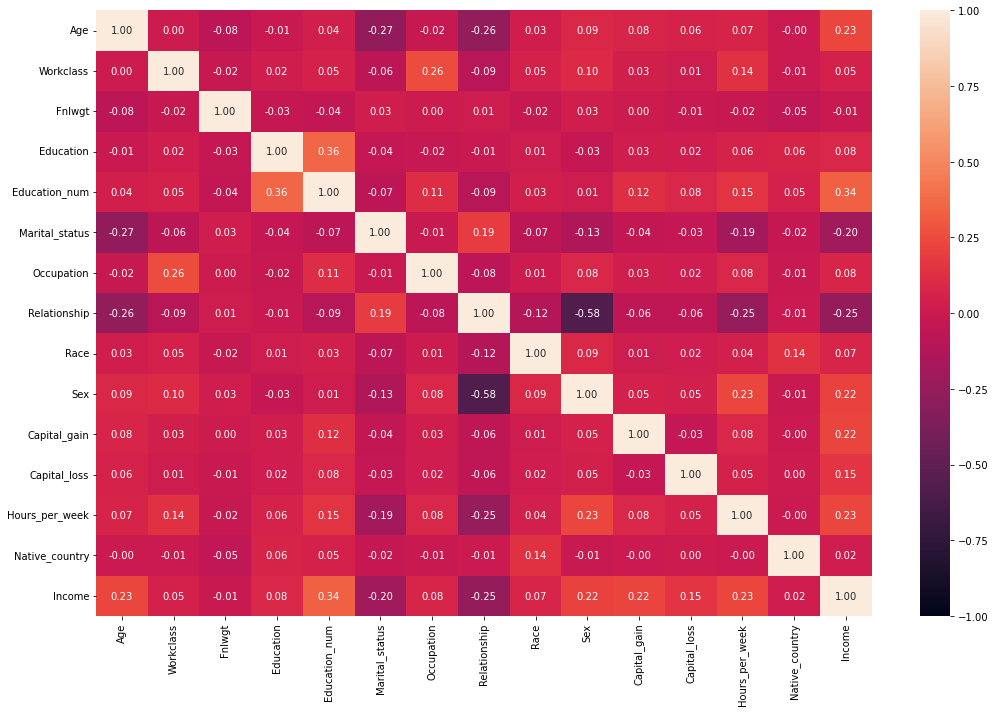

In [50]:
df_correlation = df_census.corr()

plt.figure(figsize = (15,10))
sns.heatmap(df_correlation, vmin=-1, vmax= 1, annot=True, fmt='.2f')
plt.tight_layout()

From the above visualization, we see that Correlation seems to be good like education having good +ve correlation; and relationship and sex having -ve correlation and rest of the columns are also having correlation but at low level.

## Preparation for model building

In [51]:
x=df_census.drop('Income',axis=1)
y=df_census['Income']

## Checking outliers using boxplot:

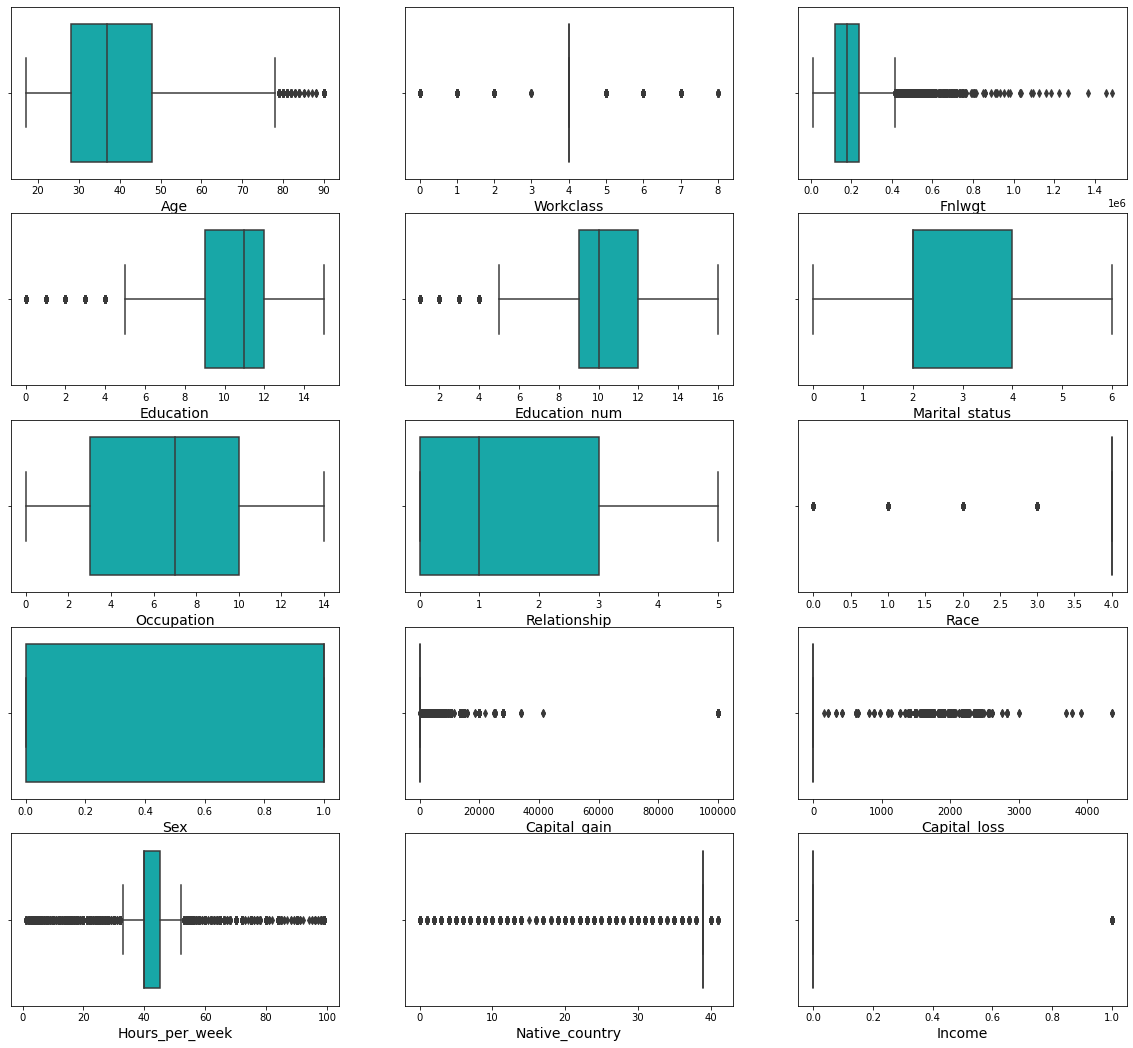

In [52]:
plt.figure(figsize = (20,45))
plot_number = 1

for i in df_census:
    if plot_number <= 16: 
        plt.subplot(12,3,plot_number)
        sns.boxplot(df_census[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

We see that there are outliers present in most of the columns.

## Remove outliers:

In [53]:
for col in x.columns:
    percentile=x[col].quantile([0.01,0.98]).values
    x[col][x[col]<=percentile[0]]=percentile[0]
    x[col][x[col]>=percentile[1]]=percentile[1]

Here we have removed the outliers with the percentile method.

## Resolving the class imbalance issue in the target column using SMOTE method:

Our dataset contains imbalanced data so we are going to use SMOTE technique to balance the imbalnced data.

In [54]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_res,y_res=smote.fit_resample(x,y)
x_new=pd.DataFrame(x_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Income'])

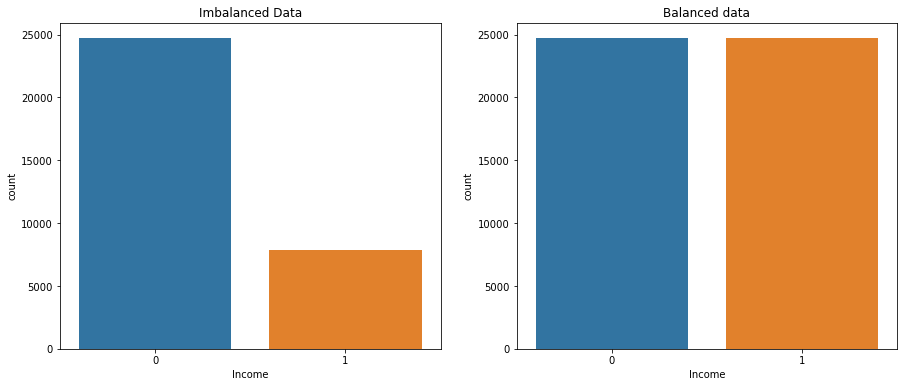

In [55]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(df_census['Income'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Income'])
plt.title("Balanced data")
plt.show()

Data has been balanced so now our model can predict every class with good accuracy.

In [56]:
#checking the shape of data before and after balancing
print(df_census.shape)
print(x_new.shape)

(32560, 15)
(49438, 14)


## Checking skewness:

In [57]:
x_new.skew()

Age               0.196472
Workclass        -0.762613
Fnlwgt            0.654669
Education        -0.974606
Education_num    -0.434739
Marital_status    0.317573
Occupation        0.085034
Relationship      1.123328
Race             -2.335373
Sex              -0.824398
Capital_gain      3.078708
Capital_loss      3.623289
Hours_per_week   -0.351824
Native_country   -3.698639
dtype: float64

We see that there is skewed data present, so we will be removing it now.

In [58]:
#removing skewness
from sklearn.preprocessing import power_transform
x_new=power_transform(x_new,method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

In [59]:
#checking skewness after removal
x_new.skew()

Age              -0.041104
Workclass         0.079889
Fnlwgt           -0.032896
Education        -0.186469
Education_num    -0.023097
Marital_status   -0.001965
Occupation       -0.173158
Relationship      0.358047
Race             -1.937048
Sex              -0.824398
Capital_gain      2.253416
Capital_loss      3.520713
Hours_per_week    0.121706
Native_country   -2.547554
dtype: float64

Not entirely, but we removed skewness upto certain level.

## Feature Scaling:

In [60]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=x.columns)

## Training multiple models:

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

In [62]:
models_classification={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "SupportVectorClassifier":SVC()
}

## Finding Best Random State

In [63]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=i)
    rfc= RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred_rfc = rfc.predict(x_test)
    acc=accuracy_score(y_test,pred_rfc)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.9016990291262136 on Random_state  19


In [64]:
#splitting the train test data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=19)

## Finding the best model:

---------------------- LogisticRegression --------------------------
Accuracy_Score 0.7901496763754046
SCORE 0.7901496763754046
Confusion metrics
[[3788 1153]
 [ 922 4025]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      4941
           1       0.78      0.81      0.80      4947

    accuracy                           0.79      9888
   macro avg       0.79      0.79      0.79      9888
weighted avg       0.79      0.79      0.79      9888

Cross_Val_Score 0.7834867416040743
ROC AUC CURVE


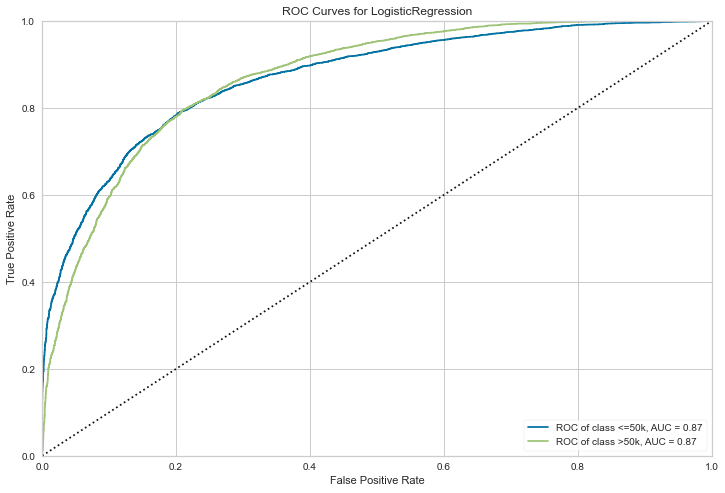

MODEL LEARNING CURVE


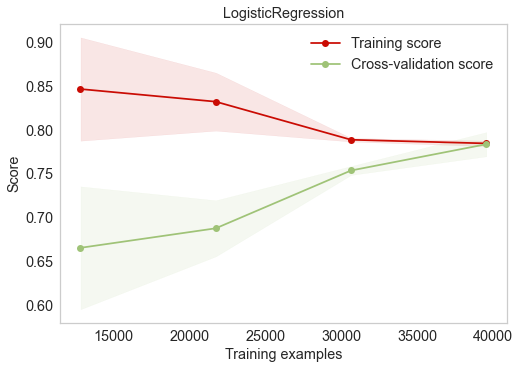

---------------------- DecisionTreeClassifier --------------------------
Accuracy_Score 0.8588187702265372
SCORE 0.8588187702265372
Confusion metrics
[[4254  687]
 [ 709 4238]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4941
           1       0.86      0.86      0.86      4947

    accuracy                           0.86      9888
   macro avg       0.86      0.86      0.86      9888
weighted avg       0.86      0.86      0.86      9888

Cross_Val_Score 0.8475279742808952
ROC AUC CURVE


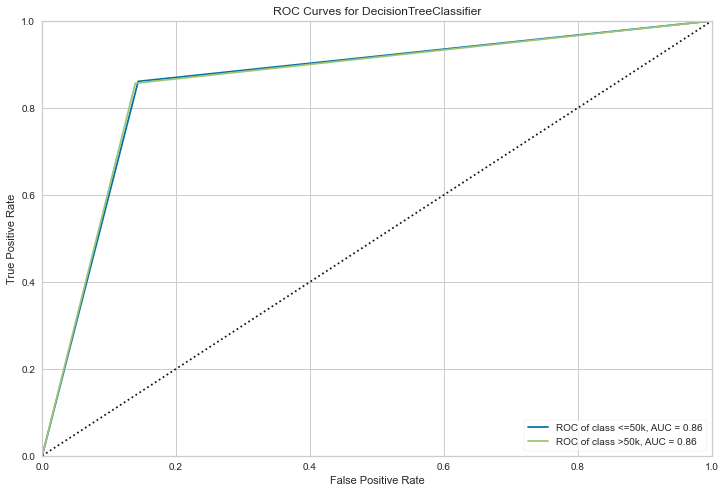

MODEL LEARNING CURVE


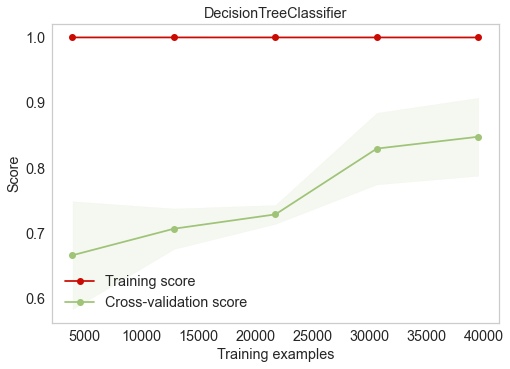

---------------------- RandomForestClassifier --------------------------
Accuracy_Score 0.9009911003236246
SCORE 0.9009911003236246
Confusion metrics
[[4482  459]
 [ 520 4427]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4941
           1       0.91      0.89      0.90      4947

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

Cross_Val_Score 0.8849487231607128
ROC AUC CURVE


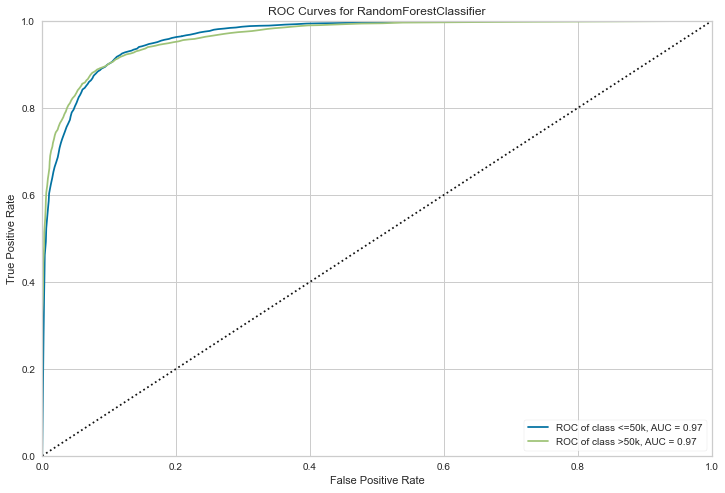

MODEL LEARNING CURVE


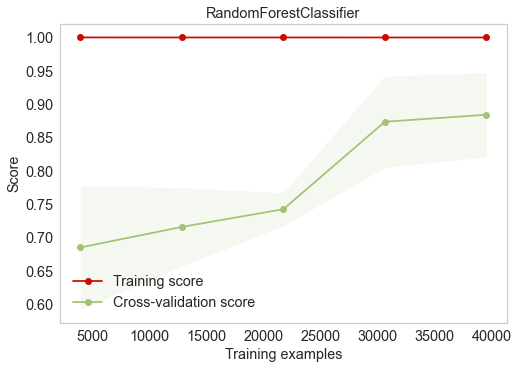

---------------------- AdaBoostClassifier --------------------------
Accuracy_Score 0.8590210355987055
SCORE 0.8590210355987055
Confusion metrics
[[4154  787]
 [ 607 4340]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4941
           1       0.85      0.88      0.86      4947

    accuracy                           0.86      9888
   macro avg       0.86      0.86      0.86      9888
weighted avg       0.86      0.86      0.86      9888

Cross_Val_Score 0.8513502947383099
ROC AUC CURVE


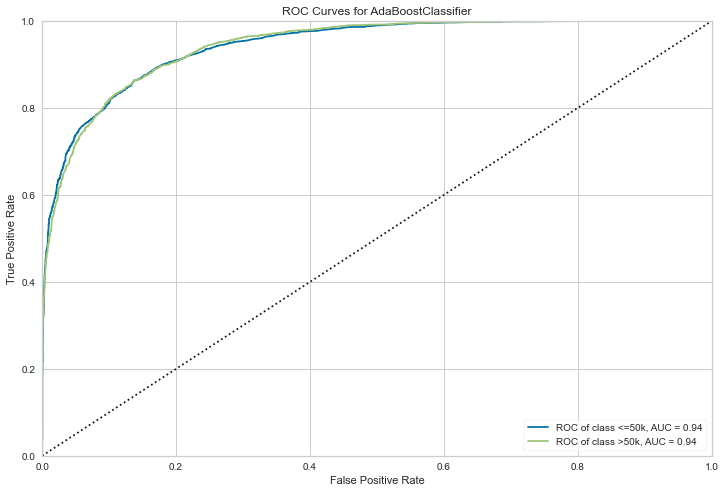

MODEL LEARNING CURVE


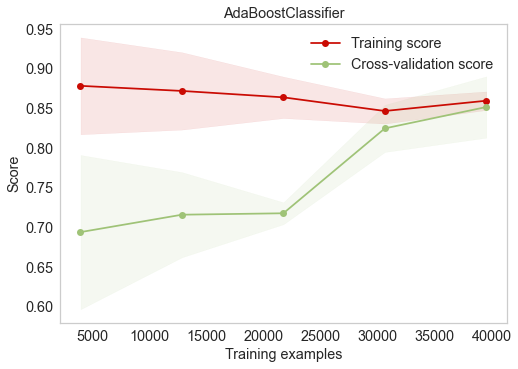

---------------------- GradientBoostingClassifier --------------------------
Accuracy_Score 0.8816747572815534
SCORE 0.8816747572815534
Confusion metrics
[[4364  577]
 [ 593 4354]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4941
           1       0.88      0.88      0.88      4947

    accuracy                           0.88      9888
   macro avg       0.88      0.88      0.88      9888
weighted avg       0.88      0.88      0.88      9888

Cross_Val_Score 0.8681596109663797
ROC AUC CURVE


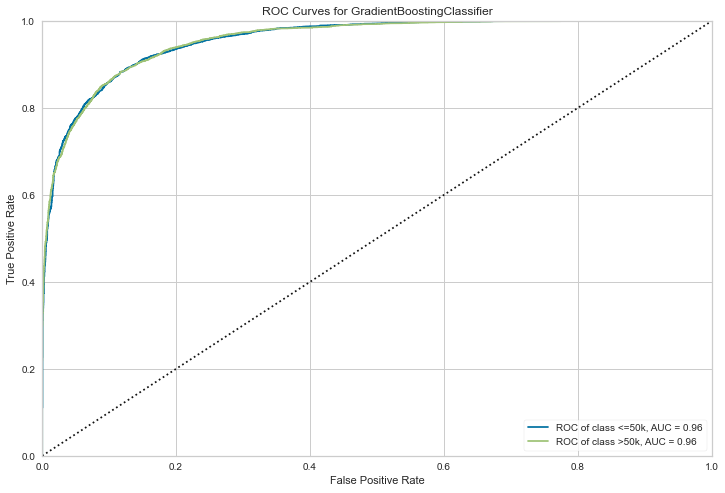

MODEL LEARNING CURVE


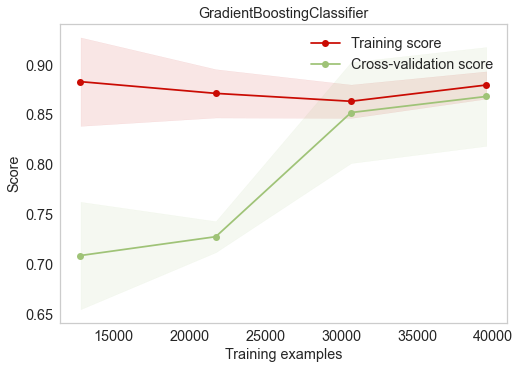

---------------------- SupportVectorClassifier --------------------------
Accuracy_Score 0.8569983818770227
SCORE 0.8569983818770227
Confusion metrics
[[4037  904]
 [ 510 4437]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      4941
           1       0.83      0.90      0.86      4947

    accuracy                           0.86      9888
   macro avg       0.86      0.86      0.86      9888
weighted avg       0.86      0.86      0.86      9888

Cross_Val_Score 0.8457471306835199
ROC AUC CURVE


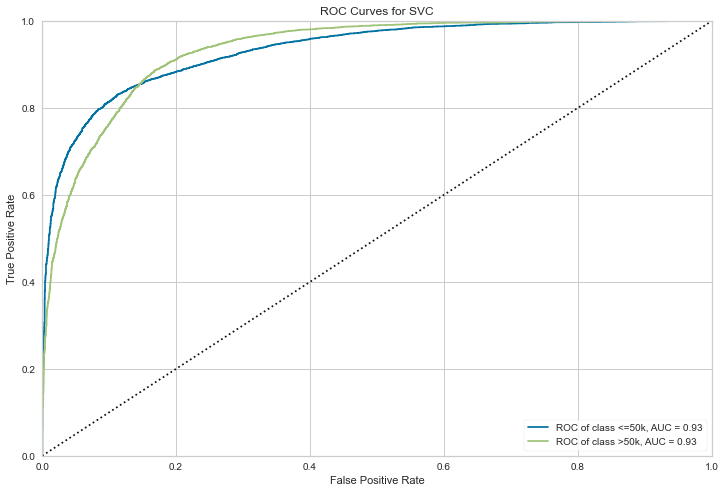

MODEL LEARNING CURVE


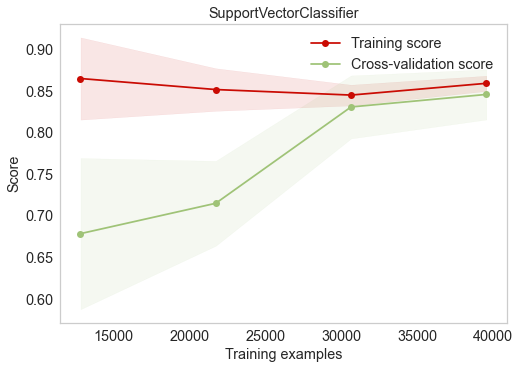

In [65]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models_classification.items():
    print("----------------------",name,"--------------------------")
    MODEL.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print("SCORE",model.score(x_test,y_test))
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print(report)
    csv=cross_val_score(model,x_new,y_new,cv=5).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print("ROC AUC CURVE")
    plt.figure(figsize=(12,8))
    roc_auc(model,x_train,y_train,X_test=x_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)

    print("MODEL LEARNING CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

In [66]:
#making a dataframe of the models
models_df=pd.DataFrame({
    'Models':MODEL,
    "Accuracy Score":Score,
    'Cross_val_score':CVS
})

models_df

Models  Accuracy Score  Cross_val_score
0          LogisticRegression        0.790150        78.348674
1      DecisionTreeClassifier        0.858819        84.752797
2      RandomForestClassifier        0.900991        88.494872
3          AdaBoostClassifier        0.859021        85.135029
4  GradientBoostingClassifier        0.881675        86.815961
5     SupportVectorClassifier        0.856998        84.574713

## We will be selecting Random Forest Classifier as it is giving us cross_val_Score of 0.88 and good metrics of  model.

## Hyperparameter tuning our best ML model:

In [67]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [69]:
param_class={
 'bootstrap': [True,False],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,1,3]}

In [70]:
Grid_classifier=GridSearchCV(estimator=rfc,param_grid=param_class,cv=5)

In [71]:
Grid_classifier.fit(x_new,y_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1, 3]})

In [72]:
Grid_classifier.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_samples': None,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [73]:
Grid_classifier.best_score_

0.8855757171736414

After successfully incorporating the Hyper Parameter Tuning on the Final Model we received the accuracy score for it i.e., 88.55%

## Final Model Learning Curve:

In [74]:
rfc=RandomForestClassifier(
 bootstrap= True,
 criterion= 'entropy',
 max_depth= None,
 max_features= 'log2',
 max_samples= None,
 min_samples_leaf= 1,
 min_samples_split= 3)

## Cross Validation Score of Final Model:

In [75]:
new_cross_validation=cross_val_score(rfc,x_new,y_new,cv=5).mean()
new_cross_validation

0.8855757028532449

In [76]:
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,pred_rfc))

0.9016990291262136


## ROC AUC Curve of Final ML Model:

ROC AUC CURVE


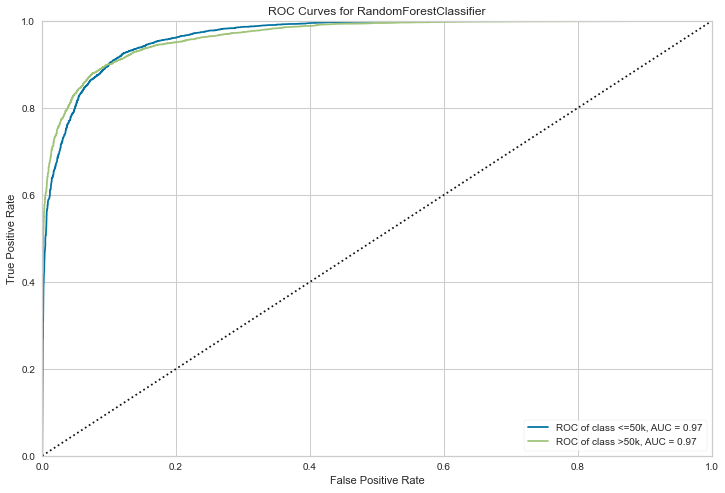

MODEL LEARNING CURVE


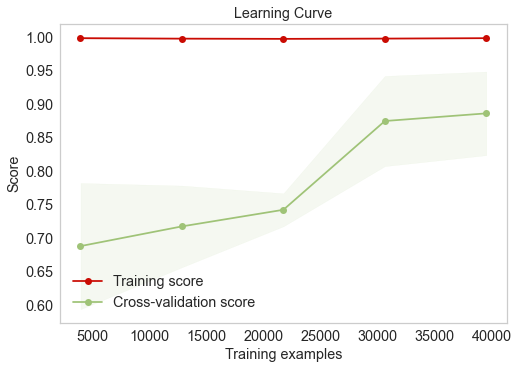

In [77]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(rfc,x_train,y_train,X_test=x_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(rfc,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large')
plt.show()

We have generated the ROC Curve for the final model and it shows the AUC score for the final model to be of 97% for both income greater or equal or less than 50k.

## Final Model Metrics:

In [78]:
print("Confusion Matrix")
print(confusion_matrix(y_test,pred_rfc))
print("Classification_Report")
print(classification_report(y_test,pred_rfc))
print("Accuracy Score",accuracy_score(y_test,pred_rfc))

Confusion Matrix
[[4494  447]
 [ 525 4422]]
Classification_Report
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4941
           1       0.91      0.89      0.90      4947

    accuracy                           0.90      9888
   macro avg       0.90      0.90      0.90      9888
weighted avg       0.90      0.90      0.90      9888

Accuracy Score 0.9016990291262136


## The Accuracy score of final classification model is 90.16%

## Saving the model:

In [79]:
import joblib
joblib.dump(rfc,"Census_Final_Model.obj")

['Census_Final_Model.obj']

## Loading the model:

In [80]:
model=joblib.load('Census_Final_Model.obj')

In [81]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 0, 0])

## Conclusion

1. In this dataset, we were asked to predict the income of people where the income is <50k or greater than 50k.

2. We analyzed the dataset firstly and then we performed EDA to understand the effect of features on our target label.

3. The data was found to be imbalanced so we used the balancing technique to balance the data by upsampling it.

4. There were many outliers so we used the percentile method to replace outliers as we didn't want to lose any data.

5. We performed model buildling using many models and we found that RandomForestClassifier was giving good matrix so we selected RandomForestClassifier model and performed hyperparameter tuning to increase the accuracy.

6. The final model accuracy was found to be 89.87% and then we saved the final ML model.